# Starbucks Capstone Challenge

### Problem Statement / Overview

This project is focused on the topic over offer recommendations on the Starbucks rewards mobile app. Nowadays, members are more and more willingly to spend through online order and offer could play a big role in user's engagement and transactions. With the data on customers' profile, offers'characteristic, all transaction details, it could help the business understand the current offer mechanism,
- Who are the cusomters active on Starbuck rewards mobile app? Who spent more frequently through offers?
- Which offer are more popular with higher usage? Which offer are more effective with impact on customers' spent behavior?

At the same time, with the interactions between users and offer, it enpower us to build up a recommendation system which could help to realize more revenues through the Starbucks rewards mobile app, basically enable us to uncover the user-offer pair with highest posibility of transactions and provided the answer for the question below,
- Who are the users we need to send the offer and what type of offer we need to send?

In addtion, the analysis on the current situation would help us to uncover our new potential customers who would be involved in the recommendation system once they registed in the app. The offer insight on the other hand could help to review the current offer designing, provision any potentials on offer adjustment or new offer design.

### 1. Introduction / Background

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. 

- An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). 

- Some users might not receive any offer during certain weeks and not all users receive the same offer.

- Every offer has a validity period before the offer expires. 

> Example A:  a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

> Example B:  a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

- You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products. Couple notes keeping in mind:
- Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. 
> For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

- You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. 
> From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.


### 2. Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record



In [206]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline
import os
print(os.getcwd())
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

/Users/apple/Desktop/project/Udacity/data_scientist/capstone-starbuck


In [207]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json')

In [208]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [209]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [210]:
transcript=transcript.sort_index()
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [211]:
print (portfolio.shape, profile.shape,transcript.shape)

(10, 6) (17000, 5) (306534, 4)


### 3. Data Cleaning

##### Portfolio Dataset

The portfolio dataset is the offer meta data, which contains offer ids and meta data about each offer (duration, type, etc). The dataset has no null value, but there are couple columns which needed to preprocess,

- Split the channels column into several columns
- Set dummy variables on offer_type


In [212]:
portfolio.dtypes

channels      object
difficulty     int64
duration       int64
id            object
offer_type    object
reward         int64
dtype: object

In [213]:
portfolio.isnull().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

In [214]:
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [215]:
def portfolio_cleanup(portfolio):
    
    # Process offer_type column and set dummy variables 
    offer_type=pd.get_dummies(portfolio['offer_type'])
    
    # Process the channels column and split in to multiple columns
    portfolio['email']=portfolio['channels'].apply(lambda x: 1 if 'email' in x else 0)
    portfolio['mobile']=portfolio['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
    portfolio['social']=portfolio['channels'].apply(lambda x: 1 if 'social' in x else 0)
    portfolio['web']=portfolio['channels'].apply(lambda x: 1 if 'web' in x else 0)
    
    # Merge the offer_type dummy variables to the Portfolio dataset
    portfolio=portfolio.merge(offer_type,how='left',left_index=True, right_index=True)
    portfolio.drop(['offer_type','channels'],axis=1,inplace=True)
    
    return portfolio
       

In [216]:
portfolio=portfolio_cleanup(portfolio)
portfolio=portfolio[['id','difficulty','duration','reward','email','mobile','social','web','bogo','discount','informational']]
portfolio.head()

,id,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,0,1,0


###### Profile Dataset

The profile dataset is about demographic data for each customer, which includes age, gender, income info. The dataset has 17000 records and 2175 out of which records with null in gender and income. All the records are the unique row with distinct customer id and there is no duplicate records. 

Couple columns need to be processed are listed below,

- Update the data type for the column became_member_on 
- Add one column on the term length that the customer become a member


In [217]:
# Check the type in each column
profile.dtypes

age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
dtype: object

In [218]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [219]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [220]:
# Check if there is any duplicated customer info
profile['id'].nunique()

17000

In [221]:
# Update the data type on the date that customer become the member
profile['became_member_on_date']=pd.to_datetime(profile['became_member_on'].astype(str),format='%Y%m%d')
profile=profile.drop(['became_member_on'], axis=1)
# Add the column member_days to obtain the length since customer became a member
profile['member_days']=profile['became_member_on_date'].apply(lambda x: (datetime.datetime.today()-x).days)

###### Transcript Dataset

The transcript dataset contains records for transactions, offers received, offers viewed, and offers completed. It has 306534 records and there is no null records. 

For the processing,

   - The value column contains dict type which needs transformations.
   - Transform the dataset based on event.


In [222]:
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [223]:
transcript.dtypes

event     object
person    object
time       int64
value     object
dtype: object

#### Processing on the value column

In [224]:
set(transcript.event.values)

{'offer completed', 'offer received', 'offer viewed', 'transaction'}

In [225]:
# Check the number of records associated with different keys in value.
keys=transcript.value.apply(lambda x: x.keys())
keys.value_counts()

(amount)              138952
(offer id)            134001
(offer_id, reward)     33578
(offer id)                 1
(offer_id, reward)         1
(amount)                   1
Name: value, dtype: int64

In [226]:
# Split the 'value' column based on key 
transcript['amount']=transcript['value'].apply(lambda x:x['amount'] if 'amount' in x else None)
transcript['offerid']=transcript['value'].apply(lambda x:x['offer id'] if 'offer id' in x.keys() else (x['offer_id'] if 'offer_id' in x.keys() else None))
transcript['reward']=transcript['value'].apply(lambda x:x['reward'] if 'reward' in x else None)
# Drop the original 'value' column
transcript=transcript.drop(['value'], axis=1)

### 4.Data Transformation

#### a. transcript dataset

Based on the info below, we could see
- If the person received and viewed offer, only offerid will be associated with that person.
- If the person completed offer, the offerid and reward will be generated.
- If the person finished transaction, only amount will be recorded.

If one offer is being received, viewed, and completed by a customer, the offerid will be the field associated with person through all three events.

Based on the customer's journey, as we know the user will start from receiving offer or not, moving to view, complete the offer and finished the transaction. 

One thing need to notice is the time along with the customer's journey,

> a. The time on offer receiving <= the time on viewing the offer  or customer didn't view the offer

> b. The time on receiving the offer <= the time on completing the offer or customers didn't complete the offer
( there are cases that the time on viewing the offer is later than the time on completing the offer )

> c. The time on completing the offer = the time for finishing the transactions

Also on the offerid, one offerid could be assgined to the users multiple times, so we need to joined the related events if the associated time is much closer.

In [227]:
# Get split dataset for each event
transcript_received=transcript[transcript['event']=='offer received']
transcript_completed=transcript[transcript['event']=='offer completed']
transcript_viewed=transcript[transcript['event']=='offer viewed']
transcript_transaction=transcript[transcript['event']=='transaction']

In [228]:
transcript_received.isnull().sum()
transcript_completed.isnull().sum()
transcript_viewed.isnull().sum()
transcript_transaction.isnull().sum()

event           0
person          0
time            0
amount          0
offerid    138953
reward     138953
dtype: int64

In [230]:
# Join the received and viewed event
transcript_sub=transcript_received.merge(transcript_viewed, on=['offerid','person'],how='left')
transcript_sub['time_x']
transcript_sub=transcript_sub.drop(['event_x','event_y','amount_x','amount_y','event_x','event_y','reward_x','reward_y'],axis=1)
transcript_sub=transcript_sub.rename(columns={"time_x":"time_received","time_y":"time_viewed"})


In [231]:
# Processing the data based on the time Make sure the time_received<=time_viewed or time_viewed is null
transcript_sub=transcript_sub[(transcript_sub['time_received']<= transcript_sub['time_viewed'])|transcript_sub['time_viewed'].isnull() ]
# pick the one that the time_viewed is closer to the time_received
transcript_sub=transcript_sub.sort_values('time_viewed').groupby(['person','offerid','time_received']).first().reset_index()


In [232]:
# Make sure one viewed offer will only be joined with one received offer
test=transcript_sub[~transcript_sub['time_viewed'].isnull()]
test['diff']=test['time_viewed']-test['time_received']
test=test.sort_values('diff').groupby(['person','offerid','time_viewed']).first().reset_index()
test.drop(['diff'],axis=1,inplace=True)
final=transcript_sub[transcript_sub['time_viewed'].isnull()].append(test)
transcript_sub=final


/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [234]:
# Join the completed event
transcript_sub2=transcript_sub.merge(transcript_completed, on=['offerid','person'],how='left')
transcript_sub2=transcript_sub2.drop(['event','amount'],axis=1)
transcript_sub2=transcript_sub2.rename(columns={'time':'time_completed'})


,offerid,person,time_received,time_viewed,time_completed,reward
0,2906b810c7d4411798c6938adc9daaa5,0009655768c64bdeb2e877511632db8f,576,NaN,576.0,2.0
1,ae264e3637204a6fb9bb56bc8210ddfd,0020c2b971eb4e9188eac86d93036a77,168,NaN,NaN,NaN
2,0b1e1539f2cc45b7b9fa7c272da2e1d7,003d66b6608740288d6cc97a6903f4f0,504,NaN,696.0,5.0
3,0b1e1539f2cc45b7b9fa7c272da2e1d7,00426fe3ffde4c6b9cb9ad6d077a13ea,336,NaN,NaN,NaN
4,2906b810c7d4411798c6938adc9daaa5,00426fe3ffde4c6b9cb9ad6d077a13ea,408,NaN,NaN,NaN


In [235]:
# Processing the data based on the time 
# Make sure the time_viewed<=time_completed
transcript_sub2=transcript_sub2[(transcript_sub2['time_received']<=transcript_sub2['time_completed']) | transcript_sub2['time_completed'].isnull()]

# pick the one that the time_completed is closer to the time_received
transcript_sub2=transcript_sub2.sort_values('time_completed').groupby(['person','offerid','time_received']).first().reset_index()

In [236]:
# Make sure one viewed offer will only be joined with one received offer
test2=transcript_sub2[~transcript_sub2['time_completed'].isnull()]
test2['diff']=test2['time_completed']-test2['time_received']
test2=test2.sort_values('diff').groupby(['person','offerid','time_completed']).first().reset_index()
test2.drop(['diff'],axis=1,inplace=True)
final2=transcript_sub2[transcript_sub2['time_completed'].isnull()].append(test2)
transcript_sub2=final2

/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [244]:
# Join the transaction data
# This will join all the behavior if there is a complete transaction
transcript_sub3=transcript_sub2.merge(transcript_transaction, left_on=['person','time_completed'],right_on=['person','time'],how='right')
transcript_sub3=transcript_sub3.drop(['offerid_y','reward_y','event'],axis=1)
transcript_sub3=transcript_sub3.rename(columns={'reward_x':'reward','offerid_x':'offerid','time':'time_transaction'})

In [245]:
# Get the offer and person if the they didn't complete the transaction 
transcript_incomplete=transcript_sub2[transcript_sub2['time_completed'].isnull()]
transcript_incomplete['time_transaction']=np.nan
#transcript_incomplete[transcript_incomplete['person']=='65f06566a2a14f64b003964f211635e1']

/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [246]:
# Append this part the the dataset
transcript_sub3=transcript_sub3.append(transcript_incomplete)
transcript_sub3=transcript_sub3[['person','offerid','time_received','time_viewed','time_completed','time_transaction','reward','amount']]
#transcript_sub3.head()

In [247]:
#transcript_sub3[transcript_sub3['person']=='65f06566a2a14f64b003964f211635e1']

In [248]:
transcript_sub3.shape

(180422, 8)

#### b. Bring in user/offer info 

In [249]:
# Join the customer profile data
output=transcript_sub3.merge(profile,left_on=['person'],right_on=['id'],how='left')
output=output.drop(['id'],axis=1)
output.head()

,person,offerid,time_received,time_viewed,time_completed,time_transaction,reward,amount,age,gender,income,became_member_on_date,member_days
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,NaN,576,576.0,2.0,10.27,33,M,72000.0,2017-04-21,1213
1,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,456.0,414,414.0,5.0,8.57,33,M,72000.0,2017-04-21,1213
2,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,540.0,528,528.0,2.0,14.11,33,M,72000.0,2017-04-21,1213
3,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,408.0,432.0,576,576.0,5.0,22.05,40,O,57000.0,2018-01-09,950
4,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,516.0,576,576.0,5.0,22.05,40,O,57000.0,2018-01-09,950


In [250]:
# Join the offer portfolio data
output=output.merge(portfolio, left_on=['offerid'],right_on=['id'],how='left')
output=output.drop(['id','reward_y'],axis=1)
output=output.rename(columns={'reward_x':'reward'})
output.head()

,person,offerid,time_received,time_viewed,time_completed,time_transaction,reward,amount,age,gender,...,member_days,difficulty,duration,email,mobile,social,web,bogo,discount,informational
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,NaN,576,576.0,2.0,10.27,33,M,...,1213,10.0,7.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,456.0,414,414.0,5.0,8.57,33,M,...,1213,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,540.0,528,528.0,2.0,14.11,33,M,...,1213,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,408.0,432.0,576,576.0,5.0,22.05,40,O,...,950,20.0,10.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,516.0,576,576.0,5.0,22.05,40,O,...,950,5.0,7.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


In [251]:
print (profile.shape,portfolio.shape,transcript.shape)

(17000, 6) (10, 11) (306534, 6)


In [252]:
print (output.shape)

(180422, 22)


#### c. Adding 'offer_success' field to identify if the offer impacted the transaction or user's behavior

- For informational offer, if the user spent within the valid duration of informational offer, the informational offer will be viewed as s success.
- For Bogo/discount offer, if the user spent by using that specific offer, the offer will be determined as a success.

In [253]:
# Get the info associated with informational offer
output_info=output[(output['offerid']=='3f207df678b143eea3cee63160fa8bed') | (output['offerid']=='5a8bc65990b245e5a138643cd4eb9837')]
# Get the list of transaction time for each person
transaction_time=output[output['offerid'].isnull()].groupby(['person'])['time_transaction'].unique().reset_index().rename(columns={'time_transaction':'list_time_transaction'})
process_success=output.merge(transaction_time,on='person',how='left')
process_success.head()

,person,offerid,time_received,time_viewed,time_completed,time_transaction,reward,amount,age,gender,...,difficulty,duration,email,mobile,social,web,bogo,discount,informational,list_time_transaction
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,NaN,576,576.0,2.0,10.27,33,M,...,10.0,7.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,"[228.0, 552.0, 660.0, 690.0, 696.0]"
1,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,456.0,414,414.0,5.0,8.57,33,M,...,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,"[228.0, 552.0, 660.0, 690.0, 696.0]"
2,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,540.0,528,528.0,2.0,14.11,33,M,...,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,"[228.0, 552.0, 660.0, 690.0, 696.0]"
3,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,408.0,432.0,576,576.0,5.0,22.05,40,O,...,20.0,10.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,"[132.0, 642.0, 654.0]"
4,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,516.0,576,576.0,5.0,22.05,40,O,...,5.0,7.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,"[132.0, 642.0, 654.0]"


In [254]:
# Identify if any information offer impact the transactions per person
process_success['offer_success']=process_success.apply(lambda row: 1 
                                                       # If the offer is informational type, any transaction done by the customers is impacted by this offer
                                                       if (row.offerid=='3f207df678b143eea3cee63160fa8bed' or row.offerid=='5a8bc65990b245e5a138643cd4eb9837') and
                                                       (type(row.list_time_transaction) is np.ndarray) and 
                                                      ((row.list_time_transaction>=row.time_received)&(row.list_time_transaction<=row.time_received+row.duration*24)).any() 
                                                         else 
                                                       # If the offer is associated with each transaction and the transaction is completed
                                                       (1 if not pd.isnull(row.time_transaction) and not pd.isnull(row.offerid) else 0), axis=1)
                                                       


In [255]:
process_success.drop(['list_time_transaction'],axis=1,inplace=True)
#process_success.head()
output=process_success

### 5. Data Analysis

#### a. Customer analysis

**(1) What group of population is intended to purchase on Starbuck Rewards App?** 

Based on the overall customer profiles within Starbuck,
- There are more males enrolled as a member
- Large proportion of customers are distributed between 40 and 60, and there are 2180 (out of 1700) customers with age over 100.
- The income is slightly right-skewly distributed, and most of customers with income between 5000 and 7000.
- Based on the number of days that customer joined the membership, most of members joined 2 - 3 years ago.

On the spent behavior perspective,
- Most customers spent 5-10 times.
- Their total spent is about 0-100.

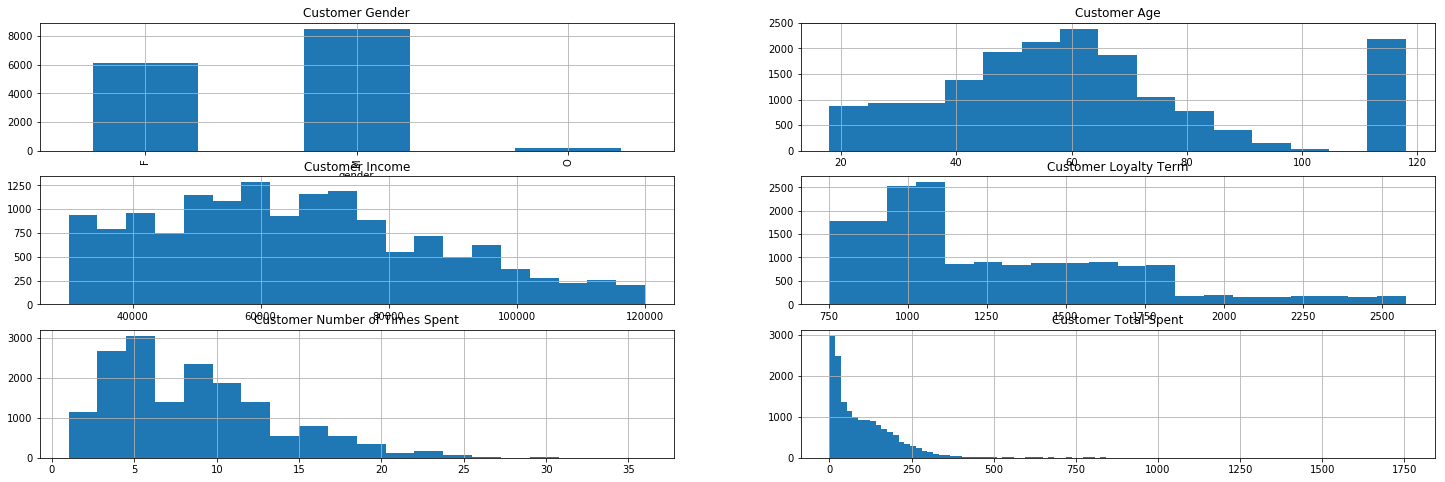

In [256]:
plt.figure(figsize=(25,8))

plt.subplot(321)
profile.groupby('gender').id.nunique().plot(kind='bar')
plt.title('Customer Gender')
plt.grid(True)

plt.subplot(322)
plt.hist(profile['age'],15)
plt.title('Customer Age')
plt.grid(True)

plt.subplot(323)
plt.hist(profile[profile['income']>0]['income'],20)
plt.title('Customer Income')
plt.grid(True)

plt.subplot(324)
plt.hist(profile['member_days'],20)
plt.title('Customer Loyalty Term')
plt.grid(True)

plt.subplot(325)
plt.hist(output[(~output['time_transaction'].isnull())].groupby(['person']).count()['time_transaction'],20)
plt.title('Customer Number of Times Spent')
plt.grid(True)

plt.subplot(326)
plt.hist(output[(~output['time_transaction'].isnull())].groupby(['person']).sum()['amount'],100)
plt.title('Customer Total Spent')
plt.grid(True)


Look at the total spend for the customers

In [257]:
spent_no_offer=output[(~output['time_transaction'].isnull())&(output['offerid'].isnull())]
not_spent_offer_unused=output[(output['time_transaction'].isnull())&(~output['offerid'].isnull())]
spent_offer=output[(~output['time_transaction'].isnull())&(~output['offerid'].isnull())]

In [258]:
# Add how many times of spent for each person using offer
spent_offer_num=spent_offer.groupby(['person','age','gender','income','member_days']).count()['offerid'].reset_index()

In [259]:
profile=profile.merge(spent_offer_num,left_on=['id'],right_on=['person'],how='left')
profile=profile.drop(['age_y','gender_y','income_y','member_days_y'],axis=1)
profile=profile.rename(columns={'age_x':"age",'gender_x':"gender",'income_x':'income','member_days_x':'member_days','offerid':'num_offer_transaction'})

In [260]:
# Add how many times of spent for each person without using an offer
spent_no_offer_num=spent_no_offer.groupby(['person','age','gender','income','member_days']).count()['time_transaction'].reset_index()

In [261]:
profile=profile.merge(spent_no_offer_num,left_on=['id'],right_on=['person'],how='left')
profile=profile.drop(['age_y','gender_y','income_y','member_days_y','person_y'],axis=1)
profile=profile.rename(columns={'person_x':'person','age_x':"age",'gender_x':"gender",'income_x':'income','member_days_x':'member_days','time_transaction':'num_transaction_no_offer'})

In [262]:
# Get the percentage of transaction through offer per customer
profile['percent_customer']=profile['num_offer_transaction']/(profile['num_offer_transaction']+profile['num_transaction_no_offer'])

** (2) Which group of population is intended to purchase through offer? **

If we look at how many offers are used by each customer out of the totoal number of purchaese (we called it as offer purchase percent), we could see:
- The profile for the customers with offer purchase percent > 60%:
    - Females are more preferred to use offer while purchasing;
    - Customers'age are more concentrated between 50 to 70, which is similar to the overall cusomters'profile;
    - The income is mostly distributed between 70k to 100k;
    - Most of users joined 2-3 years ago;
    - The total number of transaction is between 3-9 time.
    
    
- The profile for the customers with offer purchase percent < 30%:
    - Males are more preferred to use offer;
    - there are more young customers within this group ;
    - Lower income group have a higher percentage in this group;
    - Most of users joined 2-3 years ago;
    - The total number of transaction is between 4-35 time, which is broader than the group with higher offer purchase percent.

In [263]:
profile['percent_customer'].describe()

count    11561.000000
mean         0.322315
std          0.173004
min          0.033333
25%          0.187500
50%          0.300000
75%          0.428571
max          0.857143
Name: percent_customer, dtype: float64

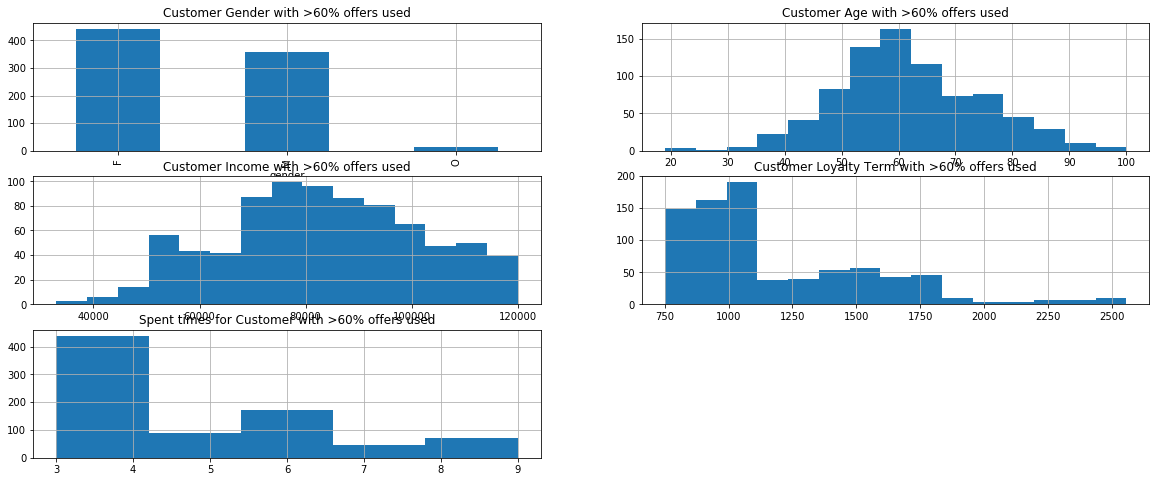

In [264]:
plt.figure(figsize=(20,8))

plt.subplot(321)
profile[profile['percent_customer']>0.6].groupby('gender').id.nunique().plot(kind='bar')
plt.title('Customer Gender with >60% offers used')
plt.grid(True)

plt.subplot(322)
plt.hist(profile[profile['percent_customer']>0.6]['age'],15)
plt.title('Customer Age with >60% offers used')
plt.grid(True)


plt.subplot(323)
plt.hist(profile[profile['percent_customer']>0.6]['income'],15)
plt.title('Customer Income with >60% offers used')
plt.grid(True)


plt.subplot(324)
plt.hist(profile[profile['percent_customer']>0.6]['member_days'],15)
plt.title('Customer Loyalty Term with >60% offers used')
plt.grid(True)

plt.subplot(325)
plt.hist(profile[profile['percent_customer']>0.6]['num_offer_transaction']+profile[profile['percent_customer']>0.6]['num_transaction_no_offer'],5)
plt.title('Spent times for Customer with >60% offers used')
plt.grid(True)


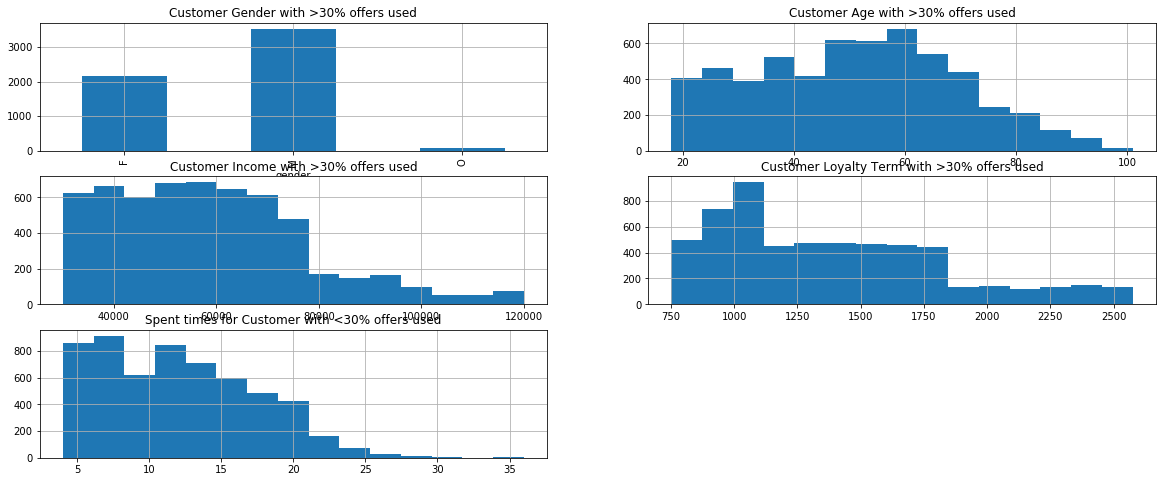

In [265]:
plt.figure(figsize=(20,8))

plt.subplot(321)
profile[profile['percent_customer']<0.3].groupby('gender').id.nunique().plot(kind='bar')
plt.title('Customer Gender with >30% offers used')
plt.grid(True)

plt.subplot(322)
plt.hist(profile[profile['percent_customer']<0.3]['age'],15)
plt.title('Customer Age with >30% offers used')
plt.grid(True)

plt.subplot(323)
plt.hist(profile[profile['percent_customer']<0.3]['income'],15)
plt.title('Customer Income with >30% offers used')
plt.grid(True)

plt.subplot(324)
plt.hist(profile[profile['percent_customer']<0.3]['member_days'],15)
plt.title('Customer Loyalty Term with >30% offers used')
plt.grid(True)

plt.subplot(325)
plt.hist(profile[profile['percent_customer']<0.3]['num_offer_transaction']+profile[profile['percent_customer']<0.3]['num_transaction_no_offer'],15)
plt.title('Spent times for Customer with <30% offers used')
plt.grid(True)

**(3) Which factors behind customers are more correlated with offer transaction? **

Based on the correlation, 
- Age, income and female gender have positive impact over the offer purchase percent.
- The length of time member stayed with Starbuck and male gender have negative impact.

In [266]:
dummy=pd.get_dummies(profile['gender'])
profile=pd.concat([profile,dummy],axis=1)
profile=profile[['age','income','member_days','F','M','O','num_offer_transaction','num_transaction_no_offer','percent_customer']]

In [267]:
corr = profile.corr()
corr.style.background_gradient(cmap='coolwarm')


,age,income,member_days,F,M,O,num_offer_transaction,num_transaction_no_offer,percent_customer
age,1,0.306703,-0.0182624,-0.140032,-0.388781,-0.0341711,0.0719646,-0.193553,0.246456
income,0.306703,1,0.0257688,0.229396,-0.225496,-0.0118077,0.148483,-0.349531,0.463687
member_days,-0.0182624,0.0257688,1,-0.00784174,0.0306968,-0.00827098,0.0933272,0.380212,-0.185626
F,-0.140032,0.229396,-0.00784174,1,-0.74945,-0.0843779,0.113167,-0.105834,0.168259
M,-0.388781,-0.225496,0.0306968,-0.74945,1,-0.112163,-0.115254,0.105525,-0.167851
O,-0.0341711,-0.0118077,-0.00827098,-0.0843779,-0.112163,1,0.00975915,-0.00081988,0.000205266
num_offer_transaction,0.0719646,0.148483,0.0933272,0.113167,-0.115254,0.00975915,1,0.0660492,0.464143
num_transaction_no_offer,-0.193553,-0.349531,0.380212,-0.105834,0.105525,-0.00081988,0.0660492,1,-0.716952
percent_customer,0.246456,0.463687,-0.185626,0.168259,-0.167851,0.000205266,0.464143,-0.716952,1


#### b. Offer Analysis

** (1) Which offer are more popular within transactions? **

From the offer involved in the transactions,
- Bogo and discount type are the major offer type in the transacions
- Offers are more diversed in channel, and email and mobile are the top 2 channels with most offers.


In [268]:
output[['bogo','discount','informational']].sum()

bogo             28470.0
discount         28395.0
informational    14571.0
dtype: float64

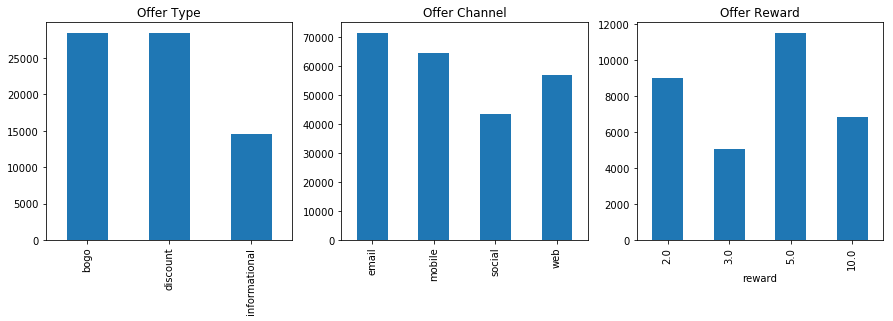

In [269]:
plt.figure(figsize=(15,4))

plt.subplot(131)
output[['bogo','discount','informational']].sum().plot(kind='bar')
plt.title('Offer Type')


plt.subplot(132)
output[['email','mobile','social','web']].sum().plot(kind='bar')
plt.title('Offer Channel')


plt.subplot(133)
output.groupby(['reward']).count()['offerid'].plot(kind='bar')
plt.title('Offer Reward')


**(2) Which offer has higher usage through transacion? **

As we could see, 
- 7 offers are evenly distributed among transactions.
- The offer with discount type have the highest percentage of usage with transaction, followed by bogo.
- The one with highest percentage usage is the offer with the id (fafdcd668e3743c1bb461111dcafc2a4)
- The offer available in all channels have the highest percent of usage, followed by the offers in  all three channels email, mobile,and web and offers. The lowest percent fall in the offers with email as the only channel.


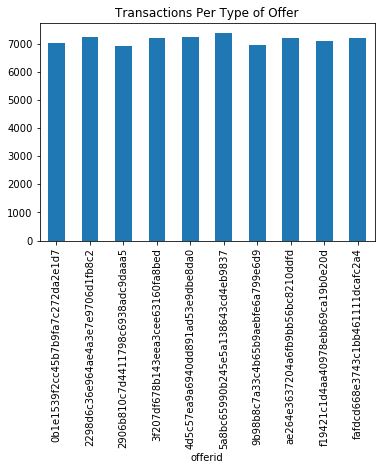

In [270]:
plt.title('Transactions Per Type of Offer')
output.groupby(['offerid']).count()['person'].plot(kind='bar')

In [271]:
# no transaction with offer
not_spent_offer_unused=output[(output['time_transaction'].isnull())&(~output['offerid'].isnull())]
# transaction with offer
spent_offer=output[(~output['time_transaction'].isnull())&(~output['offerid'].isnull())]
# offer with transaction or informational offer with transaction within its duration
effective_offer_information=output[output['offer_success']==1]

#percentage of offer being used with transaction
percent_offer=spent_offer.groupby(['offerid']).count()['person']/spent_offer.append(not_spent_offer_unused).groupby(['offerid']).count()['person']
# How many offers sent by offer type
num_offer=output.groupby(['offerid']).count()['person'].reset_index()
# Including information offer to check the impact/effectiveness of the offer
effective_offer=output[output['offer_success']==1].groupby(['offerid']).count()['person']/output.groupby(['offerid']).count()['person']


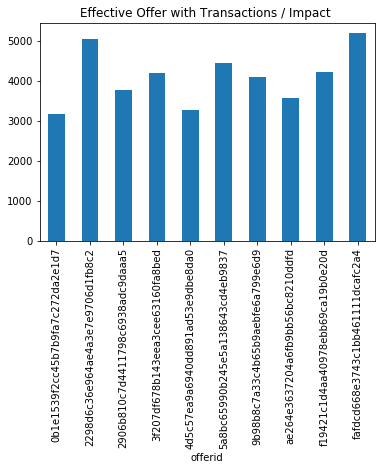

In [272]:
plt.title('Effective Offer with Transactions / Impact ')
effective_offer_information.groupby(['offerid']).count()['person'].plot(kind='bar')

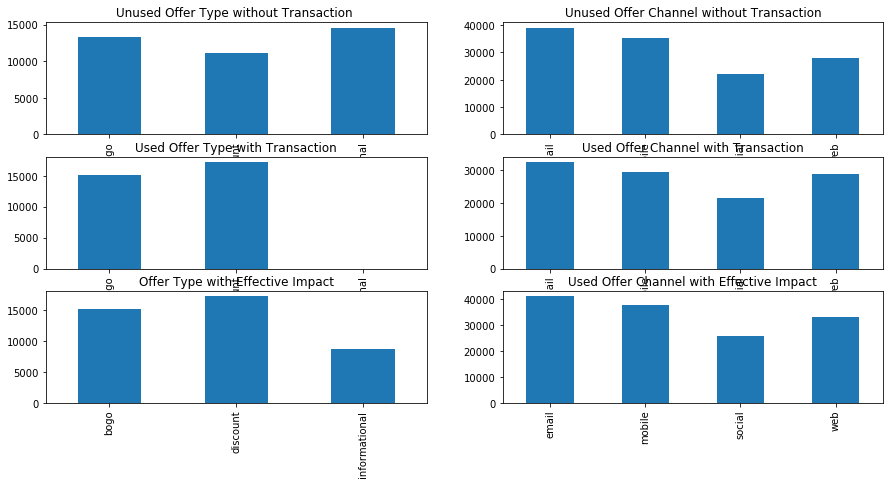

In [77]:
plt.figure(figsize=(15,7))

plt.subplot(321)
not_spent_offer_unused[['bogo','discount','informational']].sum().plot(kind='bar')
plt.title('Unused Offer Type without Transaction ')


plt.subplot(322)
not_spent_offer_unused[['email','mobile','social','web']].sum().plot(kind='bar')
plt.title('Unused Offer Channel without Transaction')

plt.subplot(323)
spent_offer[['bogo','discount','informational']].sum().plot(kind='bar')
plt.title('Used Offer Type with Transaction')


plt.subplot(324)
spent_offer[['email','mobile','social','web']].sum().plot(kind='bar')
plt.title('Used Offer Channel with Transaction')


plt.subplot(325)
effective_offer_information[['bogo','discount','informational']].sum().plot(kind='bar')
plt.title('Offer Type with Effective Impact')


plt.subplot(326)
effective_offer_information[['email','mobile','social','web']].sum().plot(kind='bar')
plt.title('Used Offer Channel with Effective Impact')

#not_spent_offer_unused.head()

In [273]:
# Add percentage of offer being used with transaction and offer effectiveness to the dataset
portfolio_copy=portfolio.merge(percent_offer.reset_index(),left_on='id',right_on='offerid',how='left')
portfolio_copy=portfolio_copy.merge(num_offer.reset_index(),left_on='id',right_on='offerid',how='left')
portfolio_copy=portfolio_copy.drop(['offerid_x','offerid_y'],axis=1)
portfolio_copy=portfolio_copy.rename(columns={"person_x":"percent_offer","person_y":"num_transaction"})

portfolio_copy=portfolio_copy.merge(effective_offer.reset_index(),left_on='id',right_on='offerid',how='left')
portfolio_copy=portfolio_copy.drop(['offerid','index'],axis=1)
portfolio_copy=portfolio_copy.rename(columns={"person":"effective_offer"})

portfolio_copy

,id,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational,percent_offer,num_transaction,effective_offer
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0,0.495343,7193,0.495343
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0,0.453426,7225,0.453426
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,0,0,1,NaN,7203,0.584618
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,1,0,0,0.590009,6966,0.590009
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,0,1,0,0.450362,7041,0.450362
5,2298d6c36e964ae4a3e7e9706d1fb8c2,7,7,3,1,1,1,1,0,1,0,0.700249,7226,0.700249
6,fafdcd668e3743c1bb461111dcafc2a4,10,10,2,1,1,1,1,0,1,0,0.719950,7213,0.719950
7,5a8bc65990b245e5a138643cd4eb9837,0,3,0,1,1,1,0,0,0,1,NaN,7368,0.603692
8,f19421c1d4aa40978ebb69ca19b0e20d,5,5,5,1,1,1,1,1,0,0,0.596528,7086,0.596528
9,2906b810c7d4411798c6938adc9daaa5,10,7,2,1,1,0,1,0,1,0,0.547650,6915,0.547650


In [274]:
portfolio=portfolio_copy

In [275]:
print ("discount type - percent offer:",portfolio[portfolio['discount']==1].percent_offer.mean())
print("bogo type - percent offer:",portfolio[portfolio['bogo']==1].percent_offer.mean())

discount type - percent offer: 0.6045528478010396
bogo type - percent offer: 0.5338263197196432


In [276]:
portfolio.groupby(['email','mobile','social','web'])['percent_offer'].mean()

email  mobile  social  web
1      0       0       1      0.450362
       1       0       1      0.568829
               1       0      0.495343
                       1      0.617538
Name: percent_offer, dtype: float64

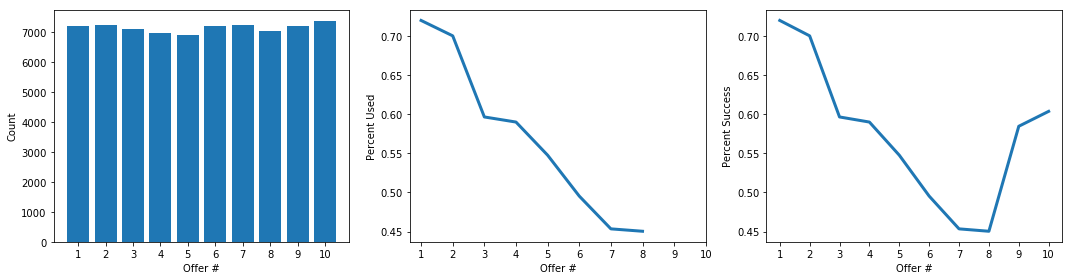

In [277]:
portfolio=portfolio.sort_values('percent_offer',ascending=False).reset_index()
f, ax = plt.subplots(figsize=(15, 4),
                     nrows=1,
                     ncols=3)

ax[0].bar(portfolio.index + 1, portfolio['num_transaction'])
ax[0].set_xticks(np.arange(0,10) + 1)
ax[0].set_xlabel('Offer #')
ax[0].set_ylabel('Count')

ax[1].plot(portfolio.index + 1,
           portfolio['percent_offer'],
           linewidth=3)
ax[1].set_xticks(np.arange(0,10) + 1)
ax[1].set_xlabel('Offer #')
ax[1].set_ylabel('Percent Used')


ax[2].plot(portfolio.index + 1,
           portfolio['effective_offer'],
           linewidth=3)
ax[2].set_xticks(np.arange(0,10) + 1)
ax[2].set_xlabel('Offer #')
ax[2].set_ylabel('Percent Success')

plt.tight_layout()

**(3) Which attribute behind offer will drive the effectiveness? **

Based on the correlation, 
- Mobile, social, web, discount type, informational type have positive impact over the offer effectiveness.
- The difficulty, reward, bogo type have negative impact.

In [278]:
corr = portfolio.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/apple/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


,index,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational,percent_offer,num_transaction,effective_offer
index,1,-0.103831,0.00790446,-0.604152,nan,0.0580259,0,0.174078,-0.426401,0.426401,0,0.462386,-0.228698,0.44167
difficulty,-0.103831,1,0.808414,0.465686,nan,-0.741058,-0.154957,0.244007,-0.0295157,0.597692,-0.695872,-0.53125,-0.404286,-0.458409
duration,0.00790446,0.808414,1,0.160262,nan,-0.529756,-0.185376,0.340557,-0.185376,0.741504,-0.681115,0.197781,-0.423193,0.0591407
reward,-0.604152,0.465686,0.160262,1,nan,-0.0784314,0.288175,-0.117647,0.792482,-0.288175,-0.617647,-0.692196,-0.101353,-0.611013
email,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mobile,0.0580259,-0.741058,-0.529756,-0.0784314,nan,1,0.408248,-0.166667,0.272166,-0.408248,0.166667,0.465331,0.260621,0.474364
social,0,-0.154957,-0.185376,0.288175,nan,0.408248,1,-0.408248,0.25,-0.166667,-0.102062,0.319809,0.699053,0.291125
web,0.174078,0.244007,0.340557,-0.117647,nan,-0.166667,-0.408248,1,-0.102062,0.408248,-0.375,0.289186,-0.521623,0.141742
bogo,-0.426401,-0.0295157,-0.185376,0.792482,nan,0.272166,0.25,-0.102062,1,-0.666667,-0.408248,-0.366393,-0.162397,-0.37871
discount,0.426401,0.597692,0.741504,-0.288175,nan,-0.408248,-0.166667,0.408248,-0.666667,1,-0.408248,0.366393,-0.279061,0.284999


#### c. Transaction

From the transaction distribution, 
- Overall, the total expense for each customer are mostly distributed between 0-500 and the average expense are between 0-50.
- For transactions with activated offer, the total expense is aligned with the overall transactions distribution but the average expense is more concentrated between 20-50.
- Purchases with spent less than 10 are mostly not through the provided offer, which might be the requirement behind the offer that u need to spend more than 10 bucks probably.

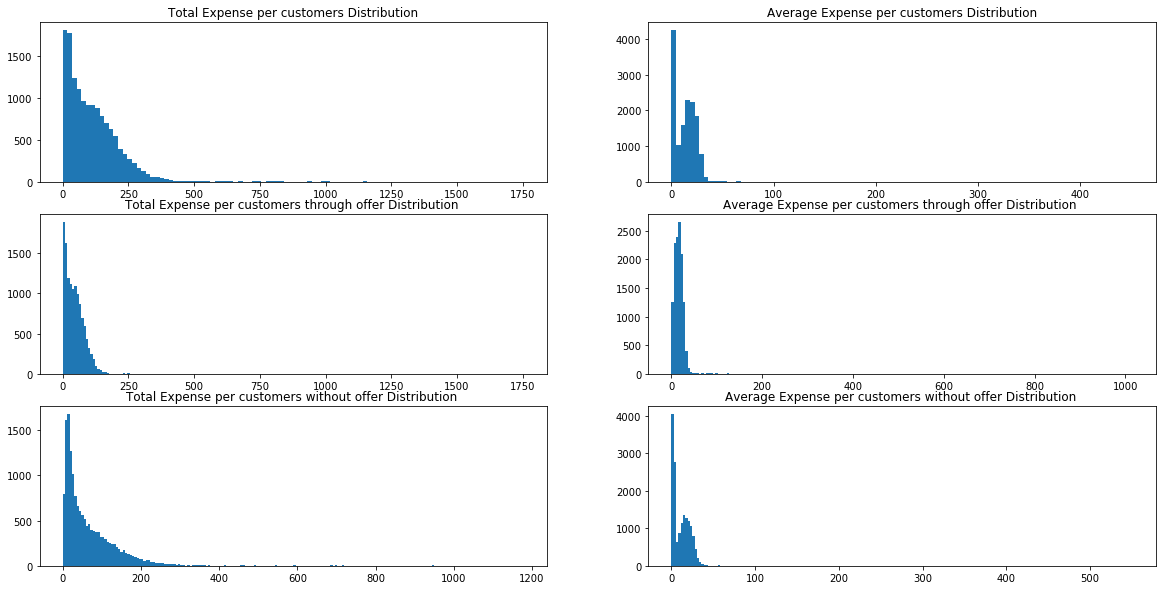

In [279]:
plt.figure(figsize=(20,10))

plt.subplot(321)
plt.hist(output[~output['time_transaction'].isnull()].groupby(['person','age','gender','income','member_days']).amount.sum(),100)
plt.title('Total Expense per customers Distribution')

plt.subplot(322)
plt.hist(output[~output['time_transaction'].isnull()].groupby(['person','age','gender','income','member_days']).amount.mean(),100)
plt.title('Average Expense per customers Distribution')

plt.subplot(323)
plt.hist(output[(~output['time_transaction'].isnull())&(~output['time_completed'].isnull())].groupby(['person']).amount.sum(),200)
plt.title('Total Expense per customers through offer Distribution ')

plt.subplot(324)
plt.hist(output[(~output['time_transaction'].isnull())&(~output['time_completed'].isnull())].groupby(['person']).amount.mean(),200)
plt.title('Average Expense per customers through offer Distribution ')

plt.subplot(325)
plt.hist(output[(~output['time_transaction'].isnull())&(output['time_completed'].isnull())].groupby(['person']).amount.sum(),200)
plt.title('Total Expense per customers without offer Distribution ')

plt.subplot(326)
plt.hist(output[(~output['time_transaction'].isnull())&(output['time_completed'].isnull())].groupby(['person']).amount.mean(),200)
plt.title('Average Expense per customers without offer Distribution ')


In [280]:
corr = output.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/apple/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


,time_received,time_viewed,time_transaction,reward,amount,age,income,member_days,difficulty,duration,email,mobile,social,web,bogo,discount,informational,offer_success
time_received,1,0.986055,0.96145,0.00956047,0.00741684,0.00148561,7.24875e-06,-0.000232187,-0.0020609,-0.00318659,nan,0.00295791,0.00235362,0.00503294,0.00196254,2.49926e-05,-0.00241491,0.0349698
time_viewed,0.986055,1,0.962486,0.0123491,0.00875096,0.00191416,-0.00246862,0.00104664,0.00182357,-0.00128963,nan,-0.0120775,-0.0165957,0.00315707,-0.00185071,-0.000640723,0.00310429,0.0198302
time_transaction,0.96145,0.962486,1,-0.0225189,0.00855626,0.00636529,0.00815921,-0.00700291,0.0457375,0.0441243,nan,-0.0510419,-0.0517515,0.0111563,-0.0370687,0.0370687,nan,0.0401733
reward,0.00956047,0.0123491,-0.0225189,1,0.0461291,-0.0226327,0.0719313,-0.0280221,0.0726691,-0.471765,nan,-0.0100604,0.233311,-0.617579,0.759068,-0.759068,nan,nan
amount,0.00741684,0.00875096,0.00855626,0.0461291,1,-0.0291699,0.23446,-0.0277019,0.0561646,0.0040144,nan,-0.0450856,-0.0102147,-0.0304422,0.0100656,-0.0100656,nan,0.133031
age,0.00148561,0.00191416,0.00636529,-0.0226327,-0.0291699,1,0.282452,-0.0463165,-0.00392597,-0.00548167,nan,0.00325662,7.96306e-05,0.00244998,0.00412931,-0.00481881,0.000835151,-0.0513004
income,7.24875e-06,-0.00246862,0.00815921,0.0719313,0.23446,0.282452,1,-0.0209646,-0.00275497,-0.000266131,nan,0.00589142,0.00554739,0.00173358,0.000117389,0.00158183,-0.00206278,0.171671
member_days,-0.000232187,0.00104664,-0.00700291,-0.0280221,-0.0277019,-0.0463165,-0.0209646,1,0.0017199,0.00220576,nan,-0.00103134,0.000334468,-0.00368852,0.000376887,-0.00165623,0.00155355,0.00211409
difficulty,-0.0020609,0.00182357,0.0457375,0.0726691,0.0561646,-0.00392597,-0.00275497,0.0017199,1,0.8086,nan,-0.737695,-0.152241,0.2487,-0.0186547,0.59573,-0.700844,-0.0801161
duration,-0.00318659,-0.00128963,0.0441243,-0.471765,0.0040144,-0.00548167,-0.000266131,0.00220576,0.8086,1,nan,-0.526061,-0.182195,0.344891,-0.179764,0.74328,-0.684288,0.0113564


### 6. User-Offer Recommendation 

In order to provide the offer to the targetted user with transaction succeed, we will build the user-offer matrix and utilize FunkSVD built up the recommendation.

#### Matrix Factorization

In [281]:
def create_user_item_matrix(input_data, filename):
    '''
    Return the user item matrix that indicate the number of offer complete of a particular user for each type of offer
    
    INPUT:
    input_data - a cleaned pre-processed dataset including portfolio, profile, and transcript dataset
    filename - the file name that save the user item matrix
    
    OUTPUT:
    user_item_matrix - the user item matrix 
        - row is user 
        - column is offer
        - value is the number of offer complete by the user (NaN means no offer given)
    
    
    '''
    # Get the dataset including completed transaction
    offer=input_data[~input_data['time_completed'].isnull()]

    # Matrics with user ids as rows and offer ids on the columns with n values where a user completed number of offers
    user_item_matrix=offer.groupby(['person', 'offerid'])['time_completed'].agg("count").unstack()
   
    # store the large martix into file
    fh = open(filename, 'wb')
    pickle.dump(user_item_matrix,fh)
    fh.close()
    
    return user_item_matrix

In [282]:
output_matrix=create_user_item_matrix(output,'user_item_matrix.p')
output_matrix.head()

offerid,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,2906b810c7d4411798c6938adc9daaa5,4d5c57ea9a6940dd891ad53e9dbe8da0,9b98b8c7a33c4b65b9aebfe6a799e6d9,ae264e3637204a6fb9bb56bc8210ddfd,f19421c1d4aa40978ebb69ca19b0e20d,fafdcd668e3743c1bb461111dcafc2a4
person,,,,,,,,
0009655768c64bdeb2e877511632db8f,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0
0011e0d4e6b944f998e987f904e8c1e5,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
0020c2b971eb4e9188eac86d93036a77,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
0020ccbbb6d84e358d3414a3ff76cffd,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN
003d66b6608740288d6cc97a6903f4f0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [283]:
train_size=int(output[~output['time_completed'].isnull()].shape[0]*0.7)
test_size=output[~output['time_completed'].isnull()].shape[0]-train_size
train_offer=output[:train_size]
test_offer=output[train_size:]

In [284]:
# Set up Train / Test group
def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique offers for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique offers for each column)
    test_idx - all of the test user ids
    test_offers - all of the test offers ids
    
    '''
    # create_user_item_matrix(input_data, filename):
    user_item_train=create_user_item_matrix(df_train,"df_train.p")
    user_item_test=create_user_item_matrix(df_test,"df_test.p")
    test_idx=list(user_item_test.index)
    test_offers=list(user_item_test.columns)
    
    return user_item_train, user_item_test, test_idx, test_offers


In [285]:
user_item_train, user_item_test, test_idx, test_offers = create_test_and_train_user_item(train_offer, test_offer)

In [290]:
## Getting FunkSVD

def FunkSVD(output_mat, latent_features=10, learning_rate=0.0001, iters=100):
    '''
    This function performs matrix factorization using a basic form of FunkSVD with no regularization
    
    INPUT:
    output_mat - (numpy array) a matrix with users as rows, movies as columns, and number of offer completed as values
    latent_features - (int) the number of latent features used
    learning_rate - (float) the learning rate 
    iters - (int) the number of iterations
    
    OUTPUT:
    user_mat - (numpy array) a user by latent feature matrix
    movie_mat - (numpy array) a latent feature by movie matrix
    '''
    
    # Set up useful values to be used through the rest of the function
    n_users =output_mat.shape[0] # number of customers in the matrix
    n_offers = output_mat.shape[1]# number of offers in the matrix
    num_complete = np.count_nonzero(~np.isnan(output_mat))# total number of ratings in the matrix
    
    # initialize the user and offers matrices with random values
    # helpful link: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html
    user_mat = np.random.rand(n_users, latent_features)# user matrix filled with random values of shape user x latent 
    offer_mat = np.random.rand(latent_features, n_offers)# offer matrix filled with random values of shape latent x offers
    
    # initialize sse at 0 for first iteration
    sse_accum = 0
    
    # header for running results
    print("Optimization Statistics")
    print("Iterations | Mean Squared Error ")
    
    # for each iteration
    for iter in range(iters):
        # update our sse
        old_sse = sse_accum
        sse_accum = 0
        
        # For each user-offer pair
        for i in range(n_users):
                for j in range(n_offers):
                # if the rating exists
                    if output_mat[i,j]>0:
                    # compute the error as the actual minus the dot product of the user and offer latent features
                        calculated=np.dot(user_mat[i,:],offer_mat[:,j])
                        error=output_mat[i,j]-calculated
                    # Keep track of the total sum of squared errors for the matrix
                        sse_accum += error**2
                    # update the values in each matrix in the direction of the gradient
                        for k in range(latent_features):
                            user_mat[i, k] += learning_rate*2*error*offer_mat[k,j]
                            offer_mat[k,j]+=learning_rate*2*error*user_mat[i,k]
        # print results for iteration
        print("%d \t\t %f" % (iter+1, sse_accum / num_complete))
    return user_mat, offer_mat 

In [292]:
# Create user-by-item matrix - nothing to do here
train_data_np = np.array(user_item_train)

# Fit FunkSVD with the specified hyper parameters to the training data
user_mat, offer_mat = FunkSVD(train_data_np, latent_features=12, learning_rate=0.005, iters=250)

Optimization Statistics
Iterations | Mean Squared Error 
1 		 0.196872
2 		 0.153415
3 		 0.151566
4 		 0.149987
5 		 0.148442
6 		 0.146926
7 		 0.145441
8 		 0.143986
9 		 0.142560
10 		 0.141162
11 		 0.139793
12 		 0.138451
13 		 0.137135
14 		 0.135846
15 		 0.134583
16 		 0.133344
17 		 0.132130
18 		 0.130940
19 		 0.129774
20 		 0.128630
21 		 0.127509
22 		 0.126410
23 		 0.125333
24 		 0.124276
25 		 0.123240
26 		 0.122225
27 		 0.121228
28 		 0.120251
29 		 0.119293
30 		 0.118353
31 		 0.117431
32 		 0.116527
33 		 0.115639
34 		 0.114769
35 		 0.113915
36 		 0.113077
37 		 0.112254
38 		 0.111447
39 		 0.110654
40 		 0.109877
41 		 0.109113
42 		 0.108363
43 		 0.107627
44 		 0.106904
45 		 0.106195
46 		 0.105497
47 		 0.104812
48 		 0.104140
49 		 0.103479
50 		 0.102829
51 		 0.102191
52 		 0.101563
53 		 0.100946
54 		 0.100340
55 		 0.099744
56 		 0.099158
57 		 0.098581
58 		 0.098014
59 		 0.097456
60 		 0.096907
61 		 0.096366
62 		 0.095835
63 		 0.095311
64 		 0

In [287]:
def predict(user_matrix, offer_matrix, user_id, offer_id):
    '''
    Make predictions for how users would react with the offers
    
    INPUT:
    user_matrix - latent factor by user matrix
    offer_matrix - latent factor by offer matrix
    user_id - the user_id from the reviews df
    offer_id - the offer_id according the offers df
    
    OUTPUT:
    pred - the predicted reaction for user_id-offer_id according to FunkSVD
    '''
    try:
        # Use the training data to create a series of users and offers that matches the ordering in training data
        # Create user-by-item matrix - nothing to do here
        user_ids_series = np.array(user_item_train.index)
        offer_ids_series = np.array(user_item_train.columns)

        # User row and Offer Column
        user_row = np.where(user_ids_series == user_id)[0][0]
        offer_col = np.where(offer_ids_series == offer_id)[0][0]

        # Take dot product of that row and column in U and V to make prediction
        pred = np.dot(user_matrix[user_row, :], offer_matrix[:, offer_col])
        
        return pred
    
    except:
        return None

In [288]:
def Validation (test_df,user_matrix, offer_matrix):
    '''
    Calculate the squared errors for the prediction
    
    INPUT:
    test_df - user_item_matrix for the test dataset
    user_matrix - latent factor by user matrix
    offer_matrix - latent factor by offer matrix
    
    OUTPUT:
    print out the squared errors for the prediction
    '''
    # total number of offer completion in the matrix
    num_complete = np.count_nonzero(~np.isnan(test_df))

    # initialize sse at 0 for first iteration
    sse_accum = 0

    for user_id in test_df.index:
        for deal_id in test_df.columns:
            if ~np.isnan( test_df.loc[user_id, deal_id]):
                prediction_value=predict(user_matrix, offer_matrix, user_id, deal_id)
                if prediction_value != None:
                    # compute the error as the actual minus the dot product of the user and offer latent feature
                    diff = test_df.loc[user_id, deal_id] - prediction_value
                    # Keep track of the total sum of squared errors for the matrix
                    sse_accum += diff**2
    
    return sse_accum / num_complete
  

** Based on this plot, we could see 12 latent features involved will deliver the highest accurancy result.**

Optimization Statistics
Iterations | Mean Squared Error 
1 		 0.447019
2 		 0.370269
3 		 0.326542
4 		 0.288674
5 		 0.256199
6 		 0.228548
7 		 0.205118
8 		 0.185326
9 		 0.168631
10 		 0.154551
Optimization Statistics
Iterations | Mean Squared Error 
1 		 0.253009
2 		 0.233598
3 		 0.222163
4 		 0.211572
5 		 0.201735
6 		 0.192605
7 		 0.184133
8 		 0.176277
9 		 0.168993
10 		 0.162240
Optimization Statistics
Iterations | Mean Squared Error 
1 		 0.208365
2 		 0.194314
3 		 0.188682
4 		 0.183429
5 		 0.178418
6 		 0.173636
7 		 0.169073
8 		 0.164720
9 		 0.160567
10 		 0.156606
Optimization Statistics
Iterations | Mean Squared Error 
1 		 0.194334
2 		 0.172574
3 		 0.169008
4 		 0.165747
5 		 0.162602
6 		 0.159565
7 		 0.156632
8 		 0.153800
9 		 0.151066
10 		 0.148426
Optimization Statistics
Iterations | Mean Squared Error 
1 		 0.190722
2 		 0.163417
3 		 0.160859
4 		 0.158486
5 		 0.156174
6 		 0.153924
7 		 0.151734
8 		 0.149603
9 		 0.147530
10 		 0.145513
Optimizati

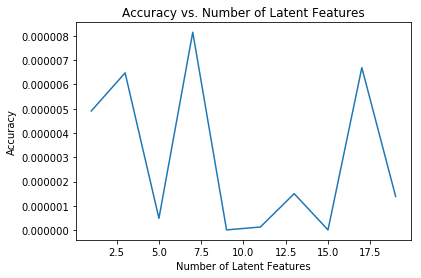

In [191]:
# Plot the Accurancy with N latent features
num_latent_feats = np.arange(1,20,2)
sse_accum_list = []


for k in num_latent_feats:
    # restructure with k latent features
    user_mat, offer_mat = FunkSVD(train_data_np, latent_features=k, learning_rate=0.005, iters=10)
    
    # compute least squared error for each prediction to actual value
    see_accum=Validation(user_item_test,user_mat, offer_mat)

    # total errors and keep track of them
    sse_accum_list.append(see_accum)
       
plt.plot(num_latent_feats, np.array(sse_accum_list));
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

In [ ]:
# Fit FunkSVD with the specified hyper parameters to the training data
user_mat, offer_mat = FunkSVD(train_data_np, latent_features=15, learning_rate=0.005, iters=250)

In [203]:
def recommend_offer(user_id,user_mat,offer_mat):
    recommend = {}
    
    for offer_id in user_item_train.columns:
        pred_val = predict(user_mat, offer_mat, user_id, offer_id)
        if pred_val != None:
            recommend[offer_id] = pred_val
        else:
            break
    if len(recommend) == 0:
        print("Since the user wasn't in our database, we provided the offer with the highest percent of effectiveness we calculated at the analysis stage.")
        offer = portfolio.sort_values('effective_offer',ascending=False)
        for offer_id in offer['id']:
            print("offer id: ", offer_id, "effective percent: ",offer[offer['id']==offer_id]['effective_offer'].values[0])
    else:
        print("recommend offer for user ", user_id)
        for offer_id, pred_val in sorted(recommend.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
            print("offer id: ", offer_id, " predicted value: ", round(pred_val,2))

In [204]:
# Recommend for a particular user and we will recommend the one with the highest predicted value
recommend_offer('0020c2b971eb4e9188eac86d93036a77',user_mat,offer_mat)

recommend offer for user  0020c2b971eb4e9188eac86d93036a77
offer id:  4d5c57ea9a6940dd891ad53e9dbe8da0  predicted value:  1.06
offer id:  ae264e3637204a6fb9bb56bc8210ddfd  predicted value:  0.94
offer id:  f19421c1d4aa40978ebb69ca19b0e20d  predicted value:  0.89
offer id:  2298d6c36e964ae4a3e7e9706d1fb8c2  predicted value:  0.88
offer id:  fafdcd668e3743c1bb461111dcafc2a4  predicted value:  0.86
offer id:  9b98b8c7a33c4b65b9aebfe6a799e6d9  predicted value:  0.83
offer id:  0b1e1539f2cc45b7b9fa7c272da2e1d7  predicted value:  0.79
offer id:  2906b810c7d4411798c6938adc9daaa5  predicted value:  0.76


In [205]:
# Recommend for a new user
recommend_offer('fff3ba4757bd42088c044ca26d73817a',user_mat,offer_mat)

Since the user wasn't in our database, we provided the offer with the highest percent of effectiveness we calculated at the analysis stage.
offer id:  fafdcd668e3743c1bb461111dcafc2a4 effective percent:  0.71995009011507
offer id:  2298d6c36e964ae4a3e7e9706d1fb8c2 effective percent:  0.7002491004705231
offer id:  5a8bc65990b245e5a138643cd4eb9837 effective percent:  0.6036916395222585
offer id:  f19421c1d4aa40978ebb69ca19b0e20d effective percent:  0.596528365791702
offer id:  9b98b8c7a33c4b65b9aebfe6a799e6d9 effective percent:  0.5900086132644272
offer id:  3f207df678b143eea3cee63160fa8bed effective percent:  0.5846175204775788
offer id:  2906b810c7d4411798c6938adc9daaa5 effective percent:  0.54765003615329
offer id:  ae264e3637204a6fb9bb56bc8210ddfd effective percent:  0.4953426942861115
offer id:  4d5c57ea9a6940dd891ad53e9dbe8da0 effective percent:  0.45342560553633215
offer id:  0b1e1539f2cc45b7b9fa7c272da2e1d7 effective percent:  0.45036216446527483
